Importing Libraries

In [1]:
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score
from sklearn.pipeline import  Pipeline

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
from sklearn.impute import SimpleImputer

Loading dataset

In [7]:
df=pd.read_csv('telcocustomerchurn.csv')

In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Preprocessing & Cleaning

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It is a numeric column but it contains some string inputs so we have to convert it into numeric.

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.drop(columns=["customerID"], inplace=True)

In [15]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [16]:
df.drop(columns=["SeniorCitizen"], inplace=True)

In [17]:
df.head(3)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
features=['gender',	'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',	'InternetService',	'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',	'StreamingTV',	'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',	'MonthlyCharges', 'TotalCharges']

Since the target column is categorical so we have to manually encode it.

In [19]:
X=df[features]
y=df['Churn'].map({'No': 0, 'Yes': 1})

Checking if classes are imbalanced

In [20]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Splitting columns

In [21]:
num_cols=['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols=['gender',	'Partner', 'Dependents', 'PhoneService', 'MultipleLines',	'InternetService',	'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',	'StreamingTV',	'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Pipeline

In [22]:
num_transformer= Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [23]:
cat_transformer= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [25]:
preprocessor= ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [27]:
pipe= Pipeline([
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42, class_weight='balanced'))
])

Cross Validation

In [29]:
skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [33]:
cv_scores=cross_val_score(pipe, X, y, cv=skf)

In [34]:
print('Each fold score = ', cv_scores)
print('Average mean =', cv_scores.mean())

Each fold score =  [0.7858156  0.77446809 0.76595745 0.75710227 0.78267045 0.77698864
 0.73721591 0.79545455 0.765625   0.76136364]
Average mean = 0.7702661589297228


Splitting Train and Test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [36]:
pipe.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
y_train_pred= pipe.predict(X_train)

Threshold tuning

Always consider threshold tuning for imbalanced classification problems where one class is more important than the other.

as classes are imbalanced so,

In churn, only ~25% of customers churn → default 0.5 may miss too many churners (low recall)

In [38]:
y_prob = pipe.predict_proba(X_test)[:, 1]

In [39]:
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55]

In [40]:
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"Threshold={t:.2f} | F1={f1:.3f} | Recall={recall:.3f}")

Threshold=0.30 | F1=0.612 | Recall=0.906
Threshold=0.35 | F1=0.630 | Recall=0.879
Threshold=0.40 | F1=0.643 | Recall=0.858
Threshold=0.45 | F1=0.652 | Recall=0.820
Threshold=0.50 | F1=0.645 | Recall=0.756
Threshold=0.55 | F1=0.645 | Recall=0.702


Pick a sweet spot

In [41]:
best_threshold = 0.45  # choose the one with best F1 or high recall
y_pred_final = (y_prob >= best_threshold).astype(int)

In [42]:
print('Confusion Matrix (test) = ', confusion_matrix(y_test, y_pred_final))
print('F1 score (train) = ', f1_score(y_train, y_train_pred))
print('F1 score (test) = ', f1_score(y_test, y_pred_final))

Confusion Matrix (test) =  [[777 259]
 [ 67 306]]
F1 score (train) =  0.7623369256948384
F1 score (test) =  0.652452025586354


Above is the best performance yet

But,

we got this performance with tuned parameters

Confusion Matrix (test) =  [[787 249]
 [ 70 303]]

F1 score (train) =  0.7709790209790209

F1 score (test) =  0.6551351351351351

Hyperparameter tuning

In [43]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [44]:
param_dist = {
    'rf__n_estimators': [100, 200, 300,400,500],
    'rf__max_depth': [10, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [2, 4, 6]
}

In [45]:
halving_search= HalvingRandomSearchCV(pipe, param_dist, cv=3, factor=3, n_jobs=-1, min_resources=100, max_resources=500, random_state=42)

In [48]:
halving_search.fit(X_train, y_train) #ignore the error

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

HalvingRandomSearchCV(cv=3,
                      estimator=Pipeline(steps=[('preprocess',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['tenure',
                                                                                   'MonthlyCharges',
                                                                                   'TotalCharges']),
                                                                     

In [49]:
print('Best Parameters:', halving_search.best_params_)

Best Parameters: {'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_depth': 15}


Confusion Matrix Heatmap

In [51]:
cm=confusion_matrix(y_test, y_pred_final)

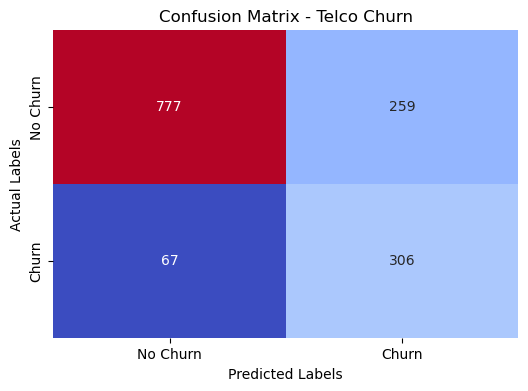

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    cbar=False,
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Telco Churn")
plt.savefig('confusionmatix.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()
